<a href="https://colab.research.google.com/github/Betsabeh/Python_codes-tutorial-/blob/main/example_python_tf_iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import Standard library
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [ ]:
#import data
data = pd.read_csv("iris.data")
print("Data format:")
print(data.head())

#separate features and labels
X = data.iloc[:,:-1]
Y =data.iloc[:,-1]
numeric_Y = Y.replace({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2})

#separate Train and Test data
X_train, X_test, Y_train, Y_test = train_test_split(X,numeric_Y)
print("------------------------------------")
print("Train size=", np.shape(X_train))
print("Test size=", np.shape(X_test))

Data format:
   5.1  3.5  1.4  0.2  Iris-setosa
0  4.9  3.0  1.4  0.2  Iris-setosa
1  4.7  3.2  1.3  0.2  Iris-setosa
2  4.6  3.1  1.5  0.2  Iris-setosa
3  5.0  3.6  1.4  0.2  Iris-setosa
4  5.4  3.9  1.7  0.4  Iris-setosa
------------------------------------
Train size= (111, 4)
Test size= (38, 4)


<ipython-input-3-9284957585ce>:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  numeric_Y = Y.replace({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2})


In [ ]:

#Create a mdoel
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Input(shape=(4,)))
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(3, activation='softmax'))



##Alternative
#input = tf.keras.layers.Input(shape=(4,))
#x = tf.keras.layers.Dense(16, activation='relu')(input)
#x= tf.keras.layers.Dense(16, activation='relu')(x)
#output = tf.keras.layers.Dense(3, activation='softmax')(x)
#model = tf.keras.models.Model(inputs=input, outputs=output)

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
##Alternative
opt=tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 403 (1.57 KB)

 Trainable params: 403 (1.57 KB)

 Non-trainable params: 0 (0.00 B)

None


Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.4965 - loss: 0.8807
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5146 - loss: 0.8468 
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5986 - loss: 0.8067
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6490 - loss: 0.7924 
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6407 - loss: 0.7808 
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6105 - loss: 0.7700
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6761 - loss: 0.7191
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6772 - loss: 0.7023
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6730 - loss: 0.6791
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6604 - loss: 0.6770
Epoch 11/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7289 - loss: 0.6527
Epoch 12/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8189 - loss: 0.6403
E

Text(0.5, 1.0, 'Training loss')

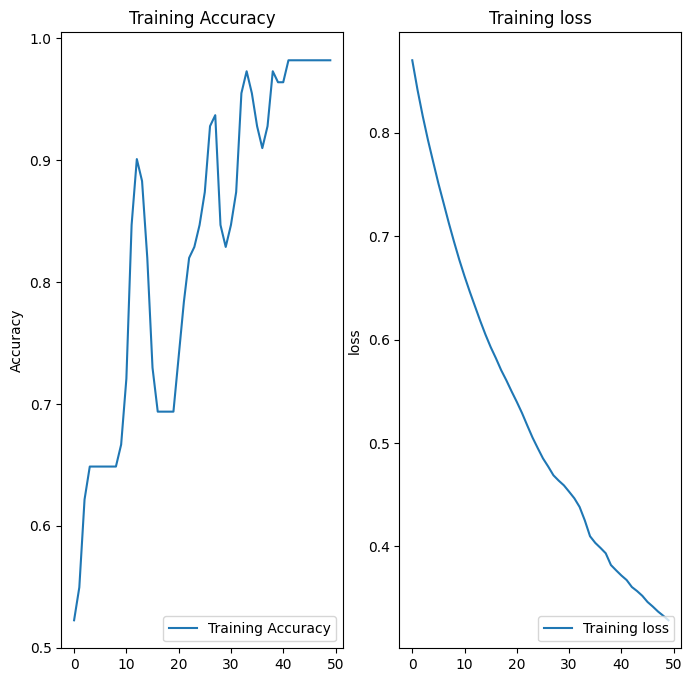

In [ ]:
#Train a model
model.fit(X_train,Y_train, epochs=50,verbose=1)
layer_weights = model.layers[0].get_weights()
print("first layer weights",layer_weights)

history = model.history

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.title('Training Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training loss')
plt.legend(loc='lower right')
plt.ylabel('loss')
plt.title('Training loss')

In [ ]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
accuracy = (y_pred == Y_test).mean()
print("Accuracy:", accuracy)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
Accuracy: 0.9736842105263158
